In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# EDA
# 1. histogram for category value
# 2. histogram for numerical value
# 3. decomposition
# 4. 

In [6]:
CustNo = pd.read_pickle('./data_tmp/CustNo1.pkl')
Dt = pd.read_pickle('./data_tmp/Dt1.pkl')
final_df = pd.read_pickle('./data_tmp/final_df1.pkl')
Label = pd.read_pickle('./data_tmp/Label1.pkl')

In [7]:
final_df10000 = pd.read_pickle('./data_tmp/final_df2.pkl')
Label10000 = pd.read_pickle('./data_tmp/Label2.pkl')

In [8]:
nor_index10000 = (Label10000 == 0)
Nor_TrData10000 = final_df10000[nor_index10000]

In [9]:
final_df30000 = pd.read_pickle('./data_tmp/final_df3.pkl')
Label30000 = pd.read_pickle('./data_tmp/Label3.pkl')

In [10]:
nor_index30000 = (Label30000 == 0)
Nor_TrData30000 = final_df30000[nor_index30000]

In [11]:
Nor_TrData10000

,3C,3D,3V,3W,3X,3Y,3o,4F,4H,4W,...,Otp_15_req,lndo_15_req,lndo_15_amt,deposit_15_req,CD_with_15_req,Night,Weekday,CustBirthDay,Regday,nffYn
0,0,0,0,1,0,0,0,0,0,0,...,0,0,-1.0,4,0,1,2,58.0,2526,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,-1.0,14,0,1,4,58.0,4794,0
0,0,0,0,0,0,0,0,0,0,1,...,0,0,-1.0,1,0,0,2,52.0,4586,0
0,0,0,0,1,0,0,0,0,0,0,...,0,0,-1.0,9,0,1,5,34.0,4,1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,-1.0,1,0,1,5,34.0,596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,0,0,0,0,0,0,0,0,0,...,0,0,-1.0,1,0,1,6,43.0,4898,0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,-1.0,0,0,1,4,23.0,1377,1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,-1.0,0,0,1,2,31.0,1213,1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,-1.0,0,0,1,4,63.0,324,0


In [12]:
mal_index = (Label == 1)
nor_index = (Label == 0)

In [13]:
# Dp list
DP_list = Dt[mal_index].duplicated()

In [14]:
Mal_TrData = final_df[mal_index]
Nor_TrData = final_df[nor_index]

In [15]:
Mal_TrData = Mal_TrData[~DP_list]

In [16]:
Mal_TrData.columns

Index(['3C', '3D', '3V', '3W', '3Y', '4F', '4H', '4W', '4s', 'tr_0_req',
       'tr_0_amt', 'Otp_0_req', 'lndo_0_req', 'lndo_0_amt', 'deposit_0_req',
       'CD_with_0_req', 'tr_3_req', 'tr_3_amt', 'Otp_3_req', 'lndo_3_req',
       'lndo_3_amt', 'deposit_3_req', 'CD_with_3_req', 'tr_7_req', 'tr_7_amt',
       'Otp_7_req', 'lndo_7_req', 'lndo_7_amt', 'deposit_7_req',
       'CD_with_7_req', 'tr_15_req', 'tr_15_amt', 'Otp_15_req', 'lndo_15_req',
       'lndo_15_amt', 'deposit_15_req', 'CD_with_15_req', 'Night', 'Weekday',
       'CustBirthDay', 'Regday', 'nffYn'],
      dtype='object')

In [17]:
Mal_TrData[['3C', '3D', '3V', '3W', '3Y', '4F', '4H', '4W', '4s']].sum()

3C     99
3D     19
3V    171
3W    742
3Y      0
4F      0
4H      6
4W     24
4s      3
dtype: int64

In [18]:
Nor_TrData[['3C', '3D', '3V', '3W', '3Y', '4F', '4H', '4W', '4s']].sample(1073).sum()

3C     25
3D     64
3V    281
3W    630
3Y      1
4F      1
4H     30
4W     30
4s     11
dtype: int64

In [19]:
# EDA를 어떻게 해야하나
# 

In [20]:
def Draw_hist(column_name, apply_log=None):
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(13,5))

    fig.suptitle("'"+str(column_name)+"' hist by transaction type",fontsize=20)
    
    if apply_log:
        
        ax1_data = np.log(Mal_TrData[column_name])
        ax1_data = np.clip(ax1_data,1e-5, None)
        ax1.hist(ax1_data, color='pink', ec='black')
        
        ax2_data = np.log(Nor_TrData[column_name])
        ax2_data = np.clip(ax2_data,1e-5, None)
        ax2.hist(ax2_data,color='skyblue', ec='black')
        
        ax3_data = np.log(Nor_TrData10000[column_name])
        ax3_data = np.clip(ax3_data,1e-5, None)
        ax3.hist(ax3_data,color='skyblue', ec='black')
        
        ax4_data = np.log(Nor_TrData30000[column_name])
        ax4_data = np.clip(ax4_data,1e-5, None)
        ax4.hist(ax4_data,color='skyblue', ec='black')
        
        fig.tight_layout()
        plt.show()
        print()
    
        return 
    
    
    ax1.hist(Mal_TrData[column_name], color='pink', ec='black')
    ax2.hist(Nor_TrData[column_name],color='skyblue', ec='black')
    ax3.hist(Nor_TrData10000[column_name],color='skyblue', ec='black')
    ax4.hist(Nor_TrData30000[column_name],color='skyblue', ec='black')

    fig.tight_layout()
    plt.show()

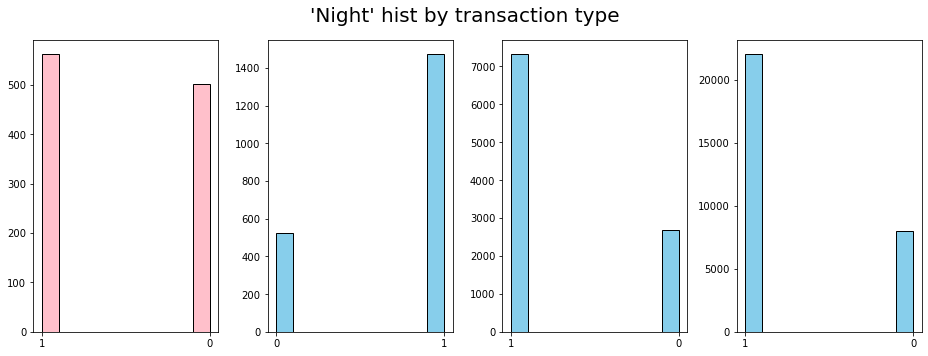

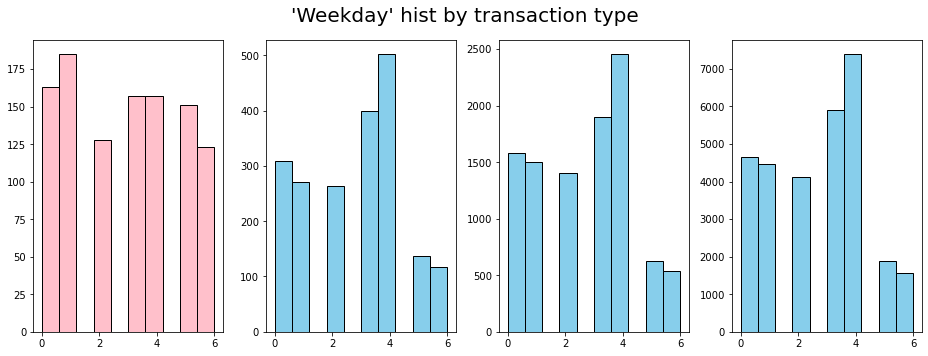

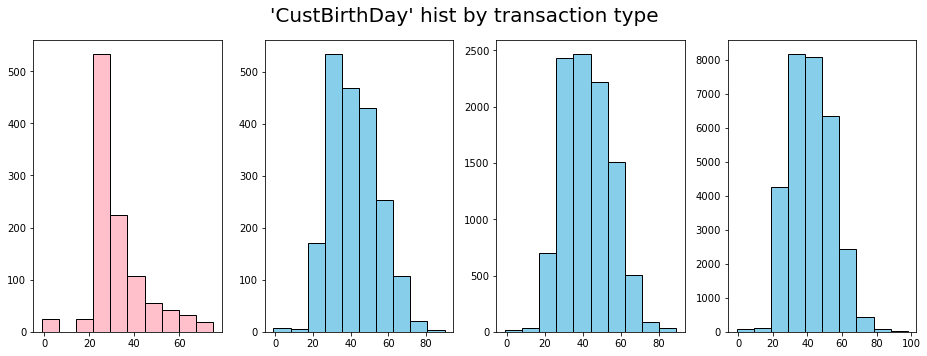

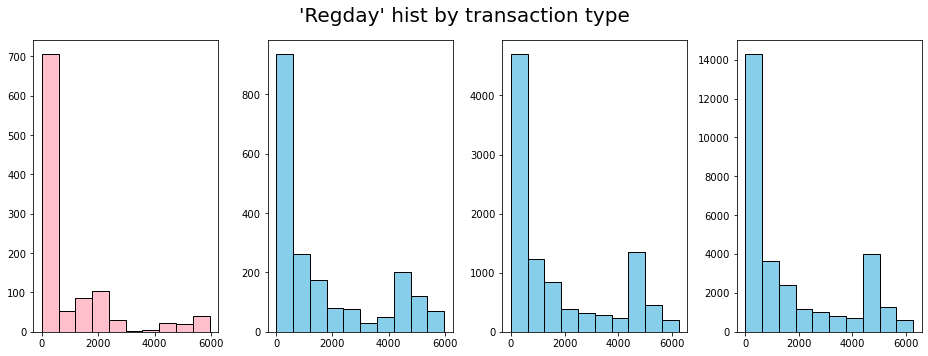

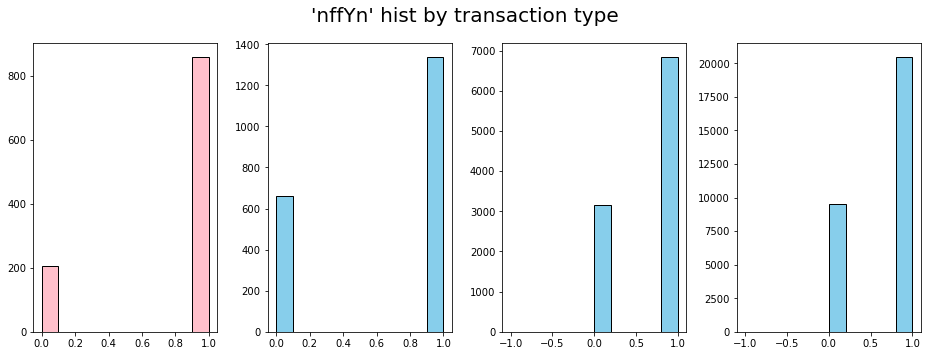

In [21]:
column_list = ['Night', 'Weekday',
       'CustBirthDay', 'Regday', 'nffYn']

for each in column_list:
    Draw_hist(str(each))

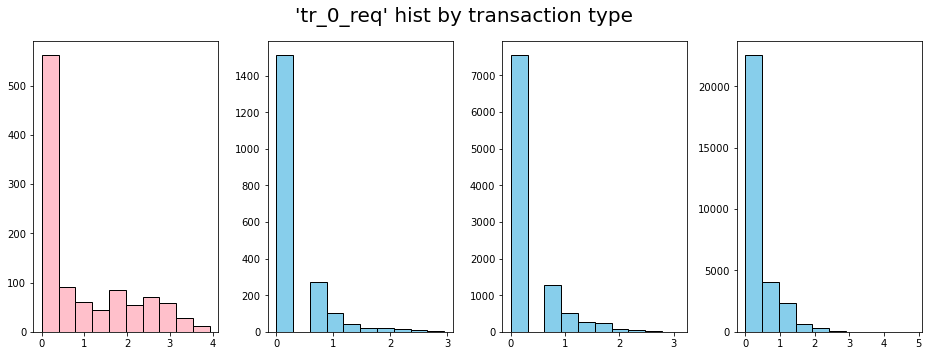

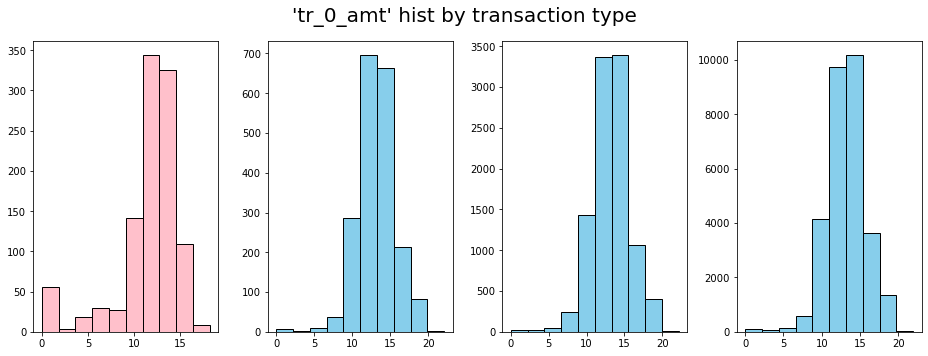

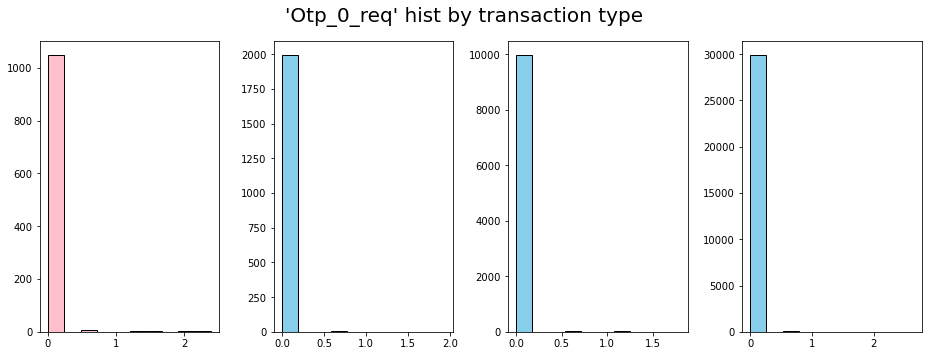

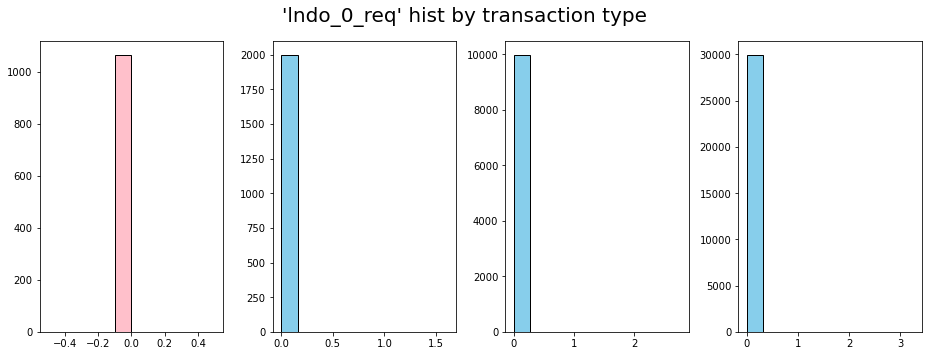

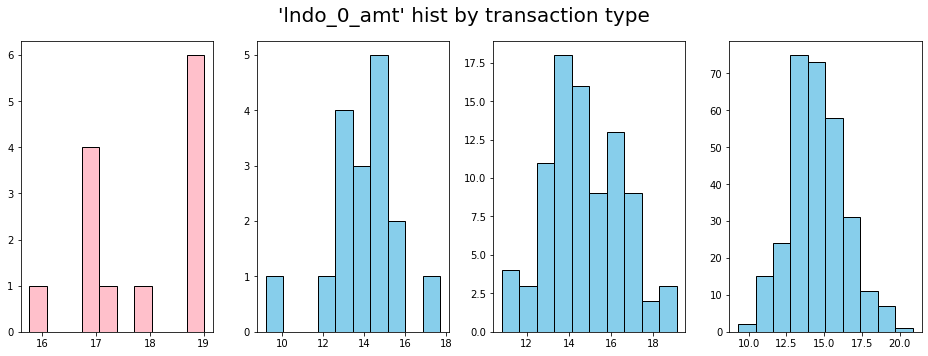

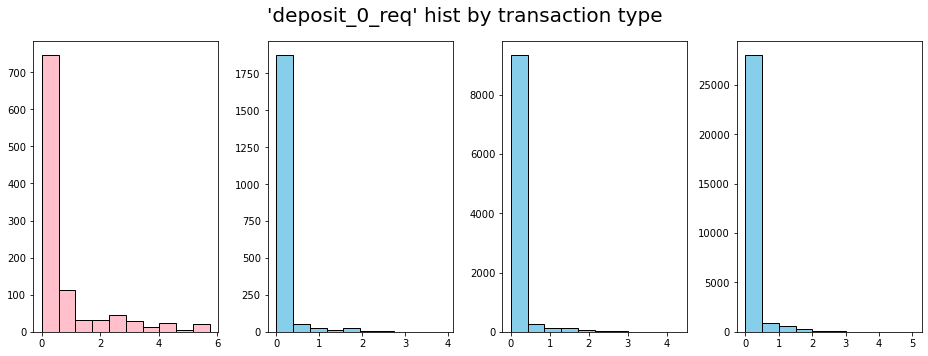

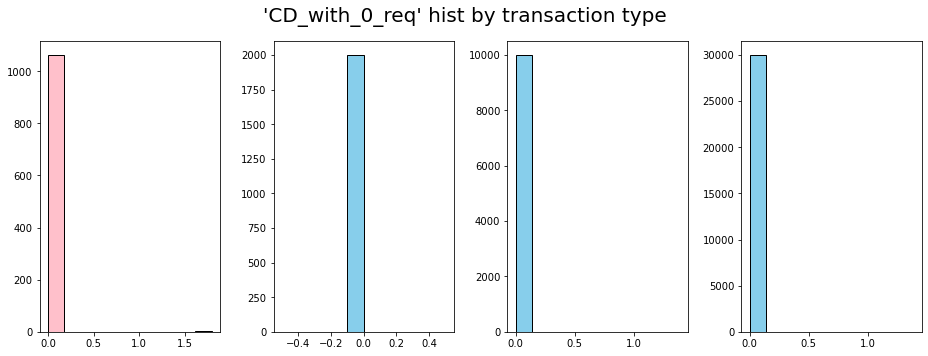

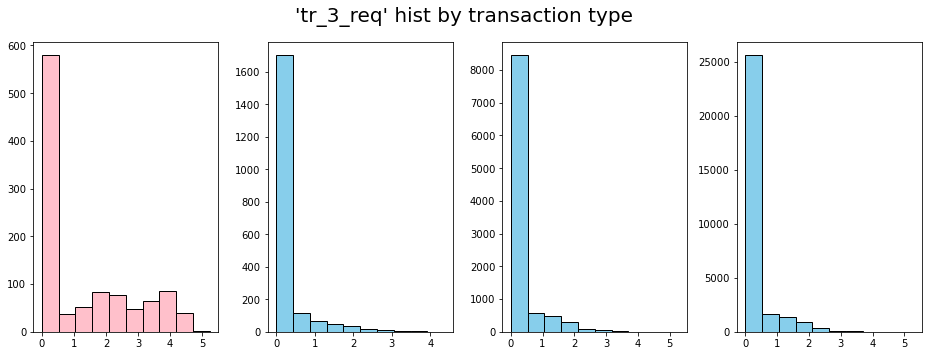

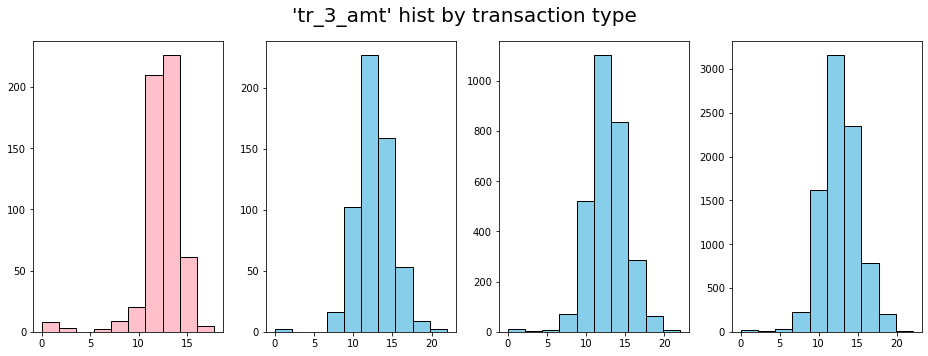

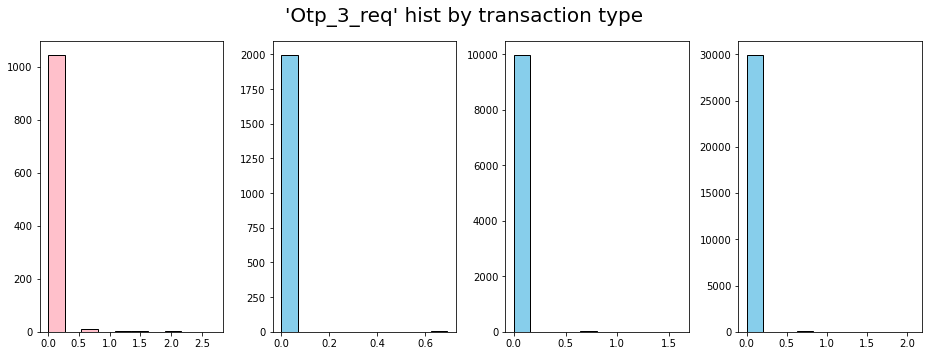

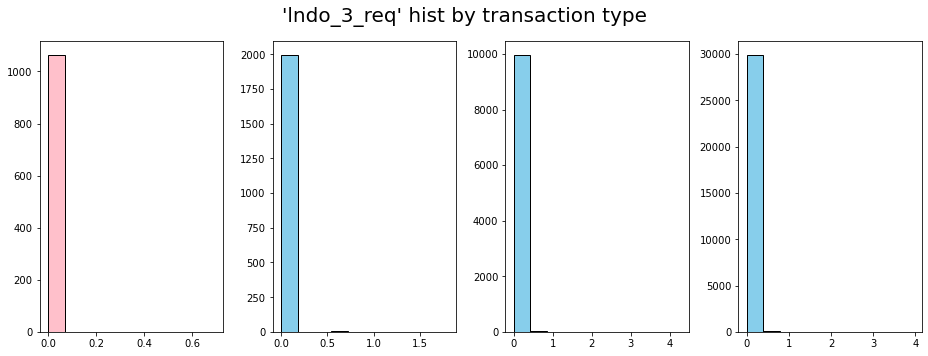

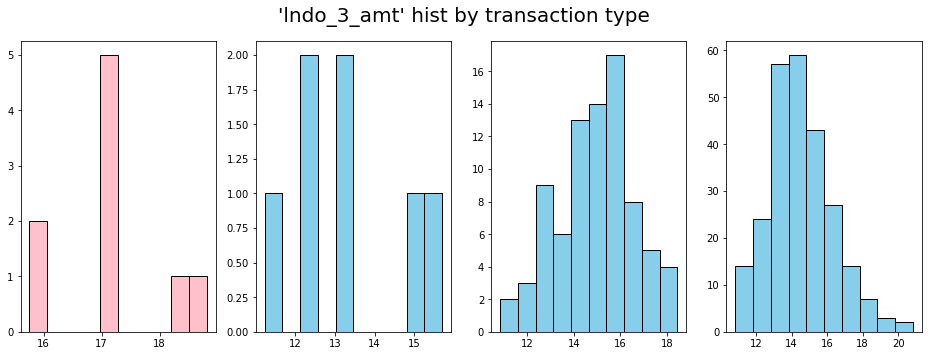

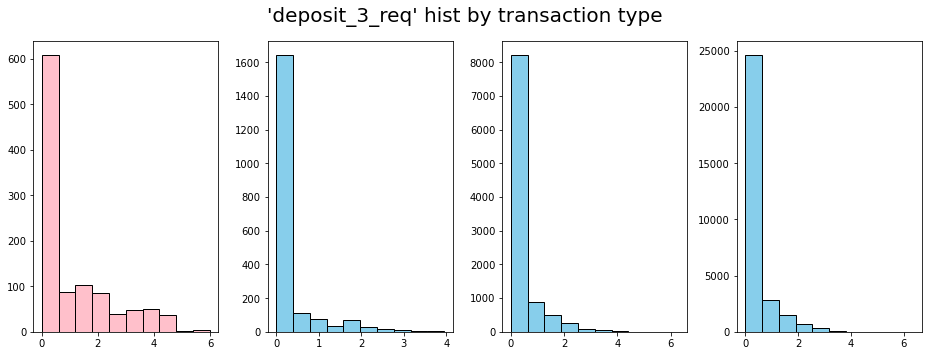

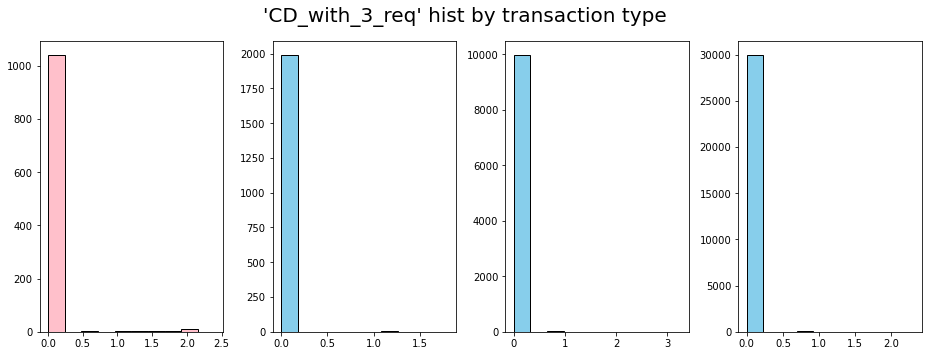

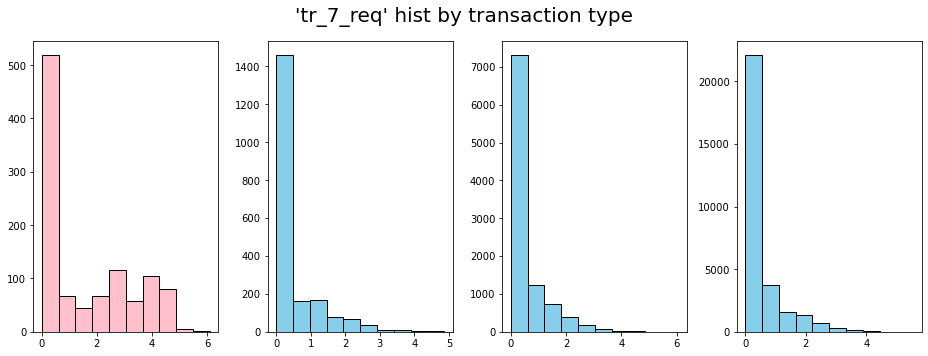

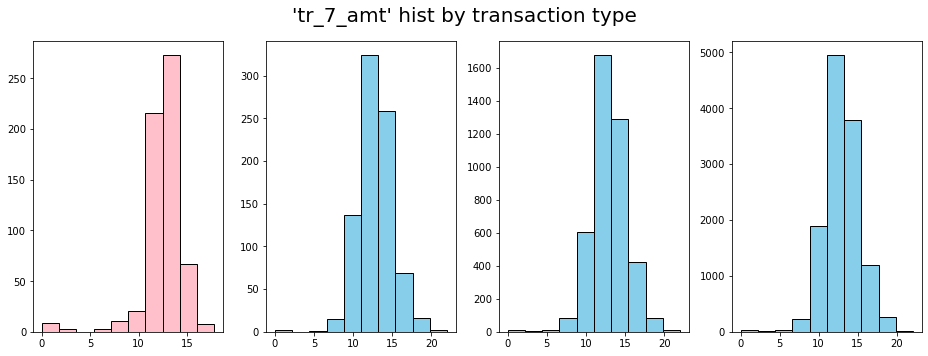

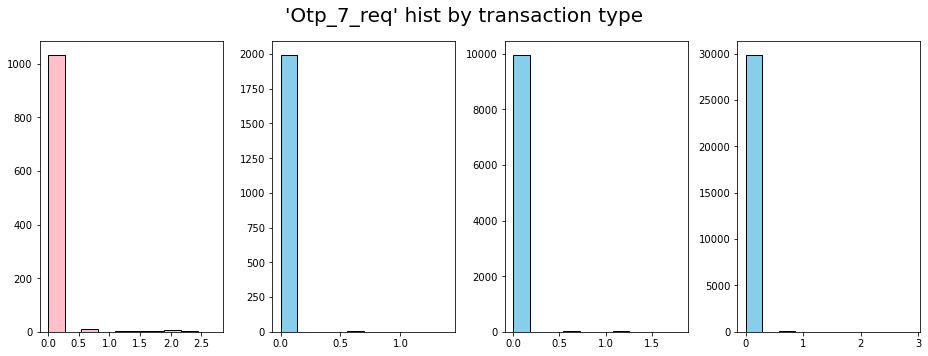

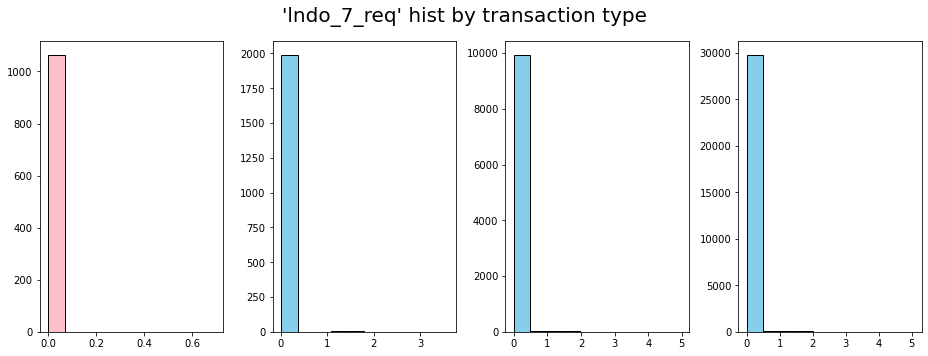

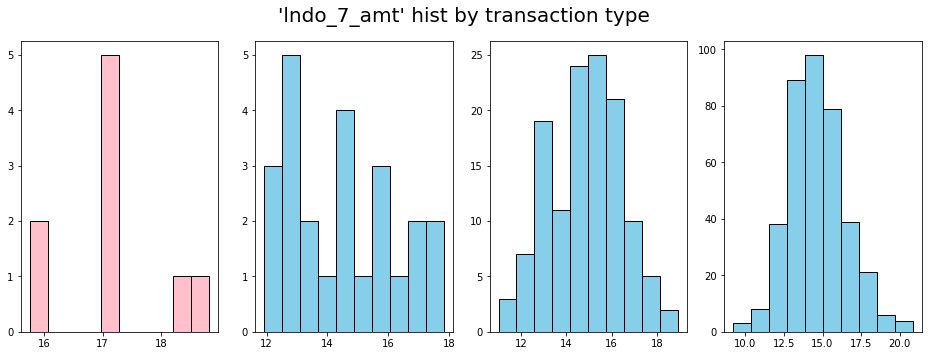

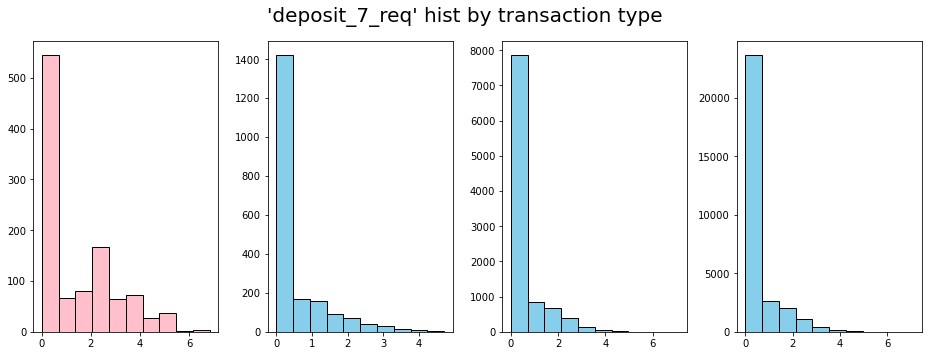

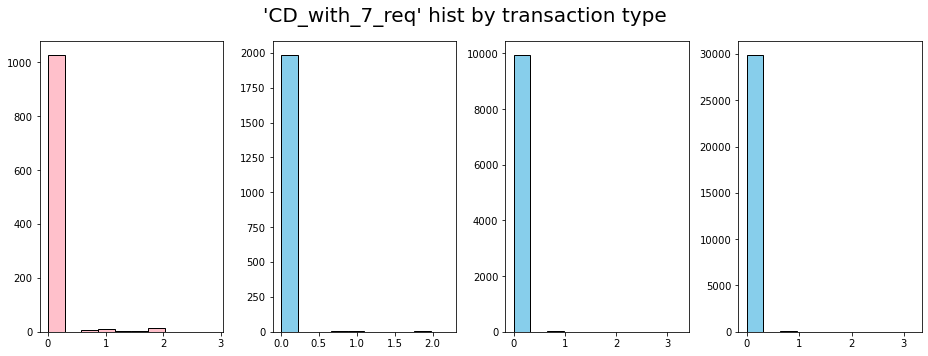

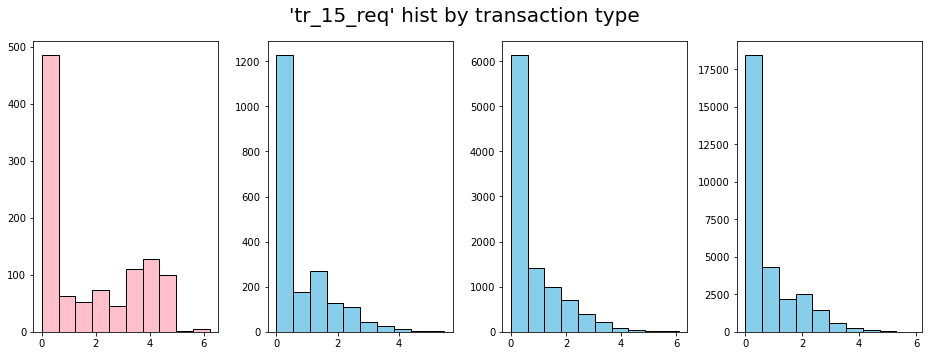

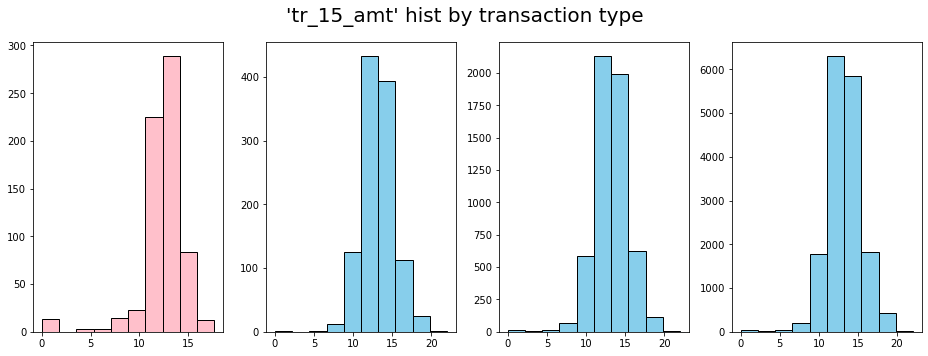

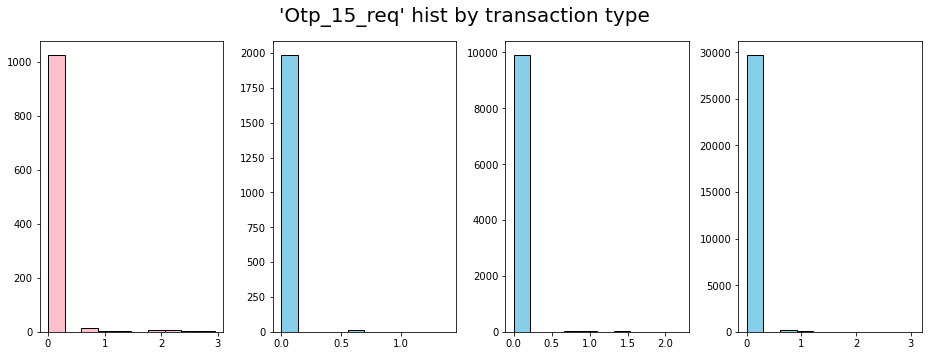

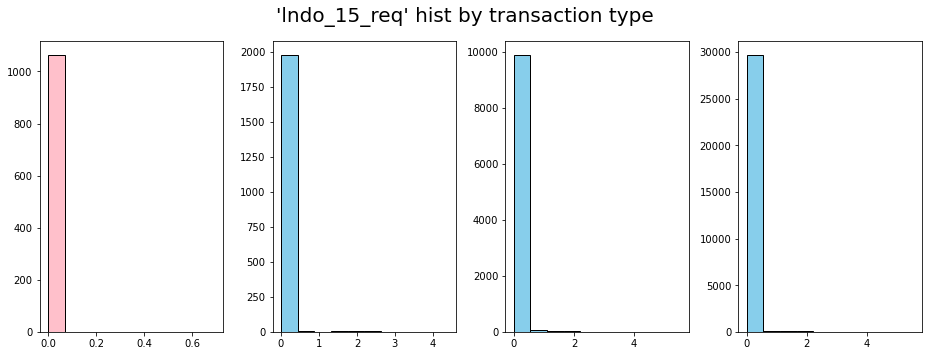

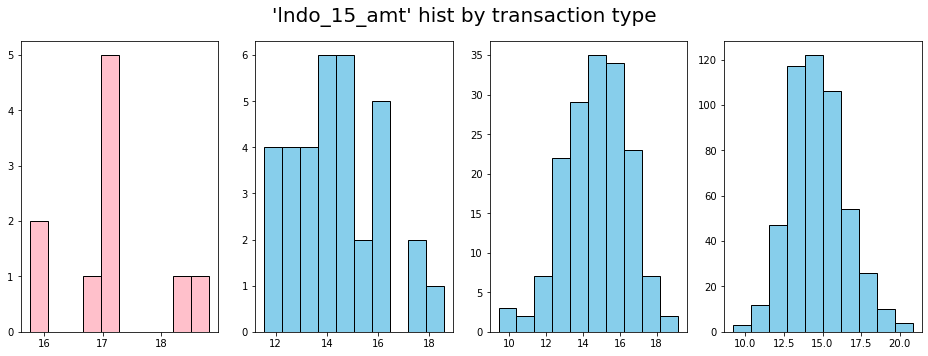

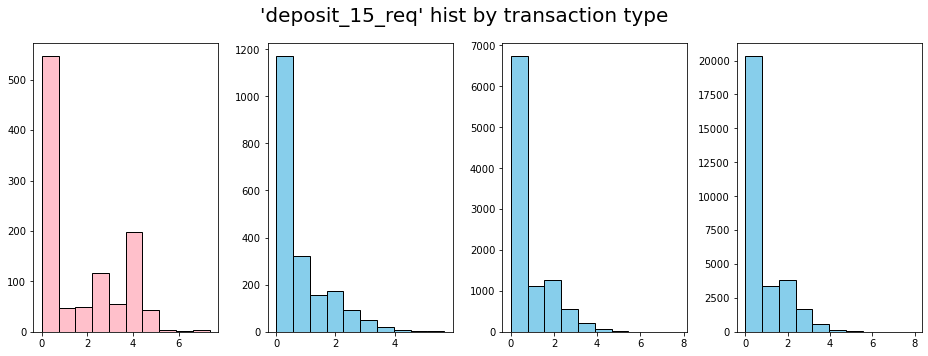

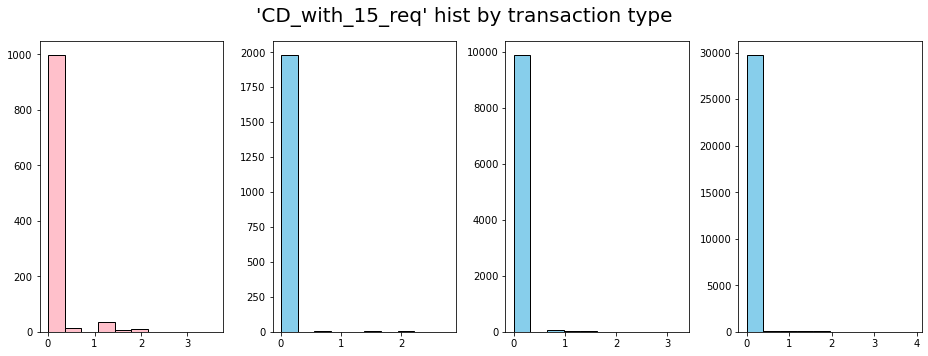

In [22]:
column_list = ['tr_0_req',
       'tr_0_amt', 'Otp_0_req', 'lndo_0_req', 'lndo_0_amt', 'deposit_0_req',
       'CD_with_0_req', 'tr_3_req', 'tr_3_amt', 'Otp_3_req', 'lndo_3_req',
       'lndo_3_amt', 'deposit_3_req', 'CD_with_3_req', 'tr_7_req', 'tr_7_amt',
       'Otp_7_req', 'lndo_7_req', 'lndo_7_amt', 'deposit_7_req',
       'CD_with_7_req', 'tr_15_req', 'tr_15_amt', 'Otp_15_req', 'lndo_15_req',
       'lndo_15_amt', 'deposit_15_req', 'CD_with_15_req']

for each in column_list:
    Draw_hist(str(each),True)

In [23]:
Numeric_df = final_df[column_list]

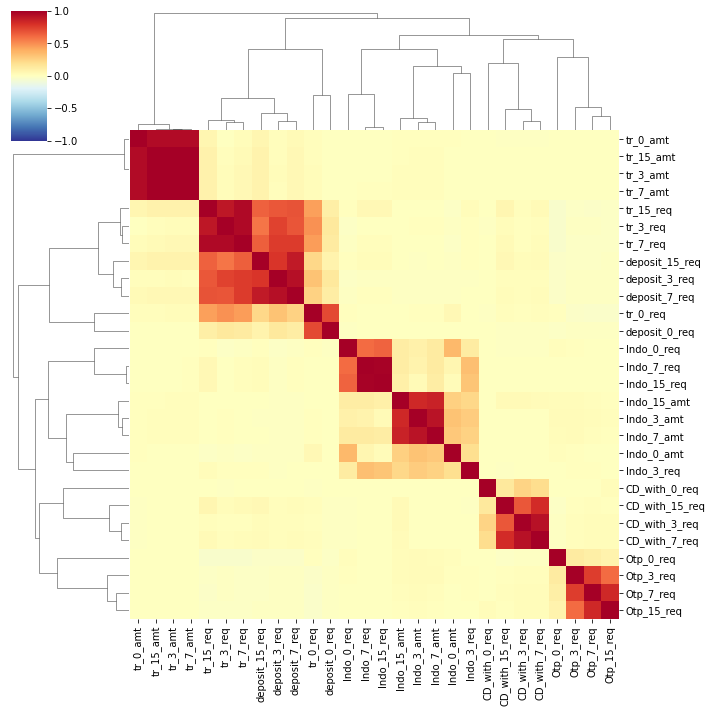

In [27]:
sns.clustermap(Numeric_df.corr(),
              annot=False,
              cmap='RdYlBu_r',
              vmin=-1,vmax=1)

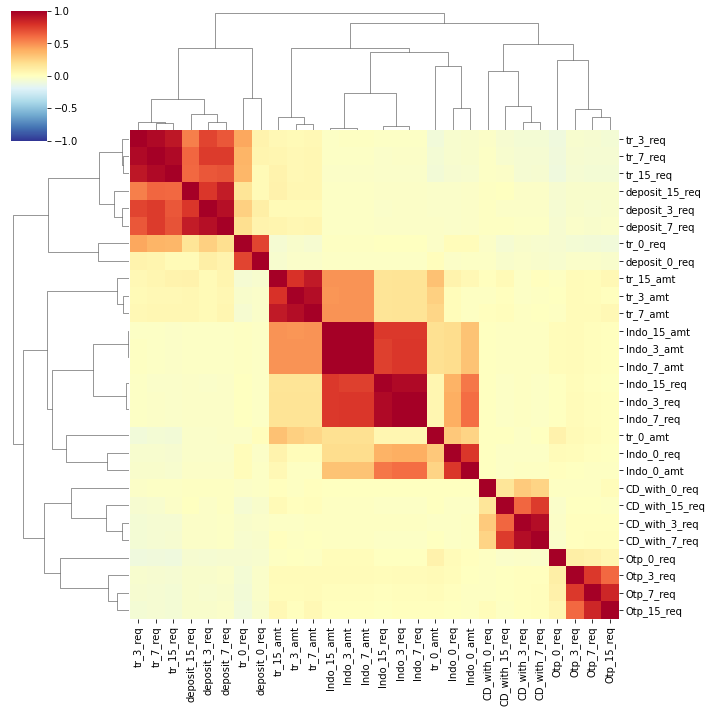

In [25]:
sns.clustermap(Mal_TrData[column_list].corr(),
              annot=False,
              cmap='RdYlBu_r',
              vmin=-1,vmax=1)

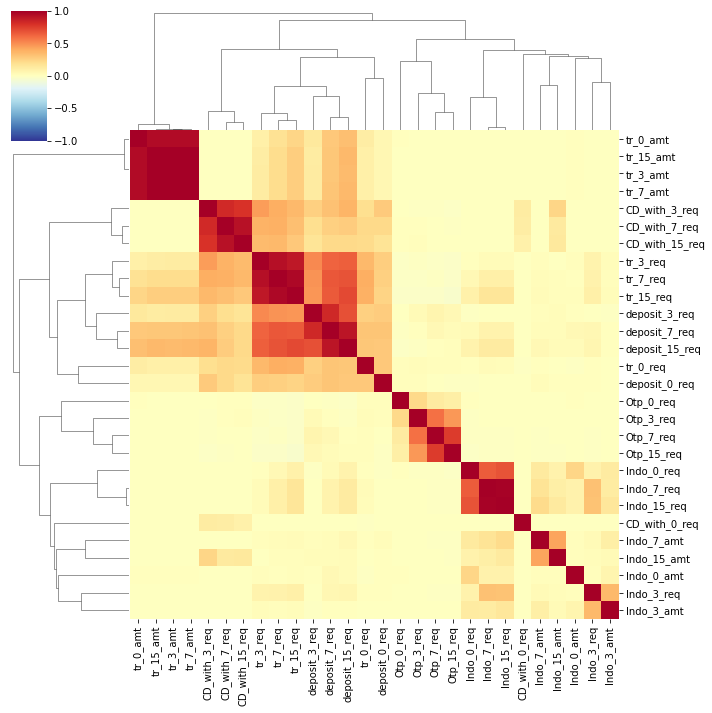

In [26]:
sns.clustermap(Nor_TrData[column_list].corr(),
              annot=False,
              cmap='RdYlBu_r',
              vmin=-1,vmax=1)

In [ ]:
# model은 model 대로 가는 거고
# pytorch로 오토 인코더를 어떻게 만들지